## Imports

In [0]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

## Preprocessing



### Load dataset

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Data normalization

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Reshaping

In [10]:
X_train = X_train.reshape(-1, 28*28)
X_train.shape

(60000, 784)

In [11]:
X_test = X_test.reshape(-1, 28*28)
X_test.shape

(10000, 784)

## Learning

### Building MLP



In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=784, ))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
_________________________________________________________________


### Train

In [13]:
history = model.fit(X_train, y_train, batch_size=100, validation_split=0.1, epochs=5)

Epoch 1/5
540/540 [==============================] - 2s 3ms/step - loss: 0.5345 - sparse_categorical_accuracy: 0.8138 - val_loss: 0.4214 - val_sparse_categorical_accuracy: 0.8458
Epoch 2/5
540/540 [==============================] - 1s 3ms/step - loss: 0.4114 - sparse_categorical_accuracy: 0.8520 - val_loss: 0.3827 - val_sparse_categorical_accuracy: 0.8608
Epoch 3/5
540/540 [==============================] - 1s 3ms/step - loss: 0.3815 - sparse_categorical_accuracy: 0.8624 - val_loss: 0.3759 - val_sparse_categorical_accuracy: 0.8627
Epoch 4/5
540/540 [==============================] - 1s 3ms/step - loss: 0.3636 - sparse_categorical_accuracy: 0.8674 - val_loss: 0.4287 - val_sparse_categorical_accuracy: 0.8360
Epoch 5/5
540/540 [==============================] - 1s 3ms/step - loss: 0.3477 - sparse_categorical_accuracy: 0.8731 - val_loss: 0.3771 - val_sparse_categorical_accuracy: 0.8630


### Evaluation

In [14]:
test_loss, test_accuracy = model.evaluate(X_train, y_train, batch_size=100)
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.4002 - sparse_categorical_accuracy: 0.8561


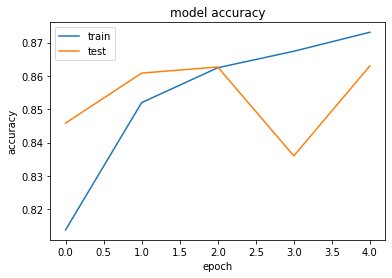

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()